In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
from google.colab import drive
import copy 

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
trainA = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainA.csv")
trainX = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainX.csv")
trainY = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainY.csv")
testX = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX.csv")
testX = testX.drop(['Unnamed: 0'], axis=1)

testX_open_answer = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer.csv")
testX_open_answer2 = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer2.csv")
testX_open_answer5 = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer5.csv")

df = trainX.merge(trainY).merge(trainA)
df = df.drop(['Unnamed: 0','event'], axis=1)

## Exploratory Data Analysis

In [ ]:
print(df.describe().T, "\n")
print(len(df), "\n")

        count      mean        std   min     25%    50%     75%     max
X0      666.0  0.496562   0.296329  0.00  0.2300  0.490  0.7600    1.00
X1      666.0  0.490165   0.287377  0.00  0.2200  0.495  0.7300    1.00
X2      666.0  0.492192   0.291935  0.00  0.2400  0.490  0.7500    1.00
X3      666.0  0.503393   0.296364  0.00  0.2300  0.505  0.7600    0.99
X4      666.0  0.524084   0.292983  0.00  0.2725  0.525  0.7900    1.00
X5      666.0  0.511907   0.282038  0.01  0.2700  0.510  0.7500    1.00
X6      666.0  0.500931   0.286806  0.00  0.2700  0.475  0.7400    1.00
X7      666.0  0.503529   0.291646  0.00  0.2600  0.490  0.7700    1.00
X8      666.0  0.485195   0.292637  0.00  0.2300  0.470  0.7400    1.00
X9      666.0  0.513919   0.289463  0.00  0.2600  0.520  0.7800    1.00
X10     666.0  0.493423   0.291362  0.00  0.2400  0.495  0.7600    1.00
X11     666.0  0.511396   0.285704  0.00  0.2700  0.520  0.7500    1.00
X12     666.0  0.493664   0.289195  0.00  0.2400  0.490  0.7400 

## Clustering

### Determine the size of K: Using Elbow & Silhouette

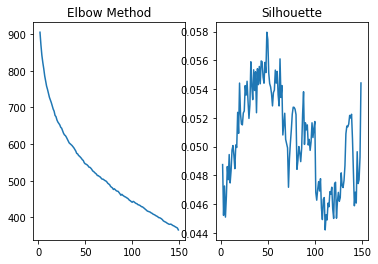

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import operator

sse = {}
sil = {}

for k in range(2, 150):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df.iloc[:,:-2])
    sse[k] = kmeans.inertia_ 
    sil[k] = silhouette_score(df.iloc[:,:-2], kmeans.labels_)

fig, axs = plt.subplots(1, 2)
axs[0].plot(list(sse.keys()), list(sse.values()))
axs[0].set_title('Elbow Method')
axs[1].plot(list(sil.keys()), list(sil.values()))
axs[1].set_title('Silhouette')
plt.show()

#sorted(sil.items(),key=operator.itemgetter(1),reverse=True)

### Group-by Mean and Count

In [ ]:
from sklearn.cluster import KMeans

num_cluster = 50
kmeans = KMeans(n_clusters=num_cluster, max_iter=1000, random_state=0).fit(df.iloc[:,:-2])

df['cluster'] = kmeans.labels_

print(df.groupby('cluster', as_index=False)['time'].agg(['mean', 'median', 'count']))
print(df.groupby('cluster', as_index=False)['Action'].agg(['mean', 'count']))

testX['cluster'] = kmeans.predict(testX.values.reshape(len(testX),17))

              mean  median  count
cluster                          
0         1.704667   0.350     15
1         2.750588   1.470     17
2         0.857000   0.625     10
3         2.668235   0.550     17
4        54.446429  15.080     14
5         1.031818   0.580     11
6         3.500000   2.745     10
7         1.228000   0.735     20
8         0.601333   0.290     15
9         0.278571   0.120      7
10        4.613125   0.515     16
11        6.480769   1.850     13
12        3.910556   2.355     18
13        1.808889   0.800      9
14        0.369000   0.390     10
15        1.413846   0.720     13
16        0.672222   0.400      9
17        0.180769   0.110     13
18       26.876667   5.260      9
19        1.340000   0.380      8
20        4.632222   1.670      9
21        1.331000   0.220     20
22        3.386667   0.470     15
23        2.771667   2.300     12
24        2.174706   1.680     17
25        4.809412   3.050     17
26        4.271765   1.900     17
27        3.53

## Naive Data Filter

In [ ]:
trainA = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainA.csv")
trainX = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainX.csv")
trainY = pd.read_csv("drive/My Drive/Colab Notebooks/Data/trainY.csv")
testX = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX.csv")
testX = testX.drop(['Unnamed: 0'], axis=1)

testX_open_answer = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer.csv")
testX_open_answer2 = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer2.csv")
testX_open_answer5 = pd.read_csv("drive/My Drive/Colab Notebooks/Data/testX_open_answer5.csv")

df = trainX.merge(trainY).merge(trainA)
df = df.drop(['Unnamed: 0','event'], axis=1)

In [ ]:
survival_time_threshold = 0.24
est_surv_time_increase = 10

bad_treated = df[df['time']<survival_time_threshold]
well_treated = df[df['time']>=survival_time_threshold]

bad_treated['Action'] = np.where(bad_treated['Action'] == 0, 1, 0)
#bad_treated['time'] += est_surv_time_increase

df = pd.concat([bad_treated, well_treated])
df.shape

(666, 19)

## X-y Setting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = pd.concat([df.iloc[:,:-2] , df.iloc[:,-1]], axis=1)
y = df.iloc[:,-2]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#display(X_train)

0.13985602426556654


## Model Training

In [ ]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB

testX_0 = copy.deepcopy(testX)
testX_1 = copy.deepcopy(testX)
testX_0['Action'] = 0
testX_1['Action'] = 1
scaler0 = MinMaxScaler(feature_range=(0,1000))
scaler1 = MinMaxScaler(feature_range=(0,1000))

answer = testX_open_answer5['action'].to_list()
#answer = testX_open_answer2['action'].to_list()

kernel_svr = 'poly'
degree_svr = 2

classifiers = [
    #KNeighborsRegressor(n_neighbors=30)      ,
    #LinearRegression(),
    #BaggingRegressor(base_estimator=svm.SVR(kernel="poly", degree=degree_svr, gamma="scale", C=22), n_estimators=100, random_state=0)
    #MLPRegressor(
    #    random_state=1, hidden_layer_sizes=(3,3) , activation='relu', max_iter=500
    #    ),
    #RandomForestRegressor(),
    #GradientBoostingRegressor(),
    #svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=50),

    svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=0.001),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=0.01),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=0.1),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=1),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=2),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=3),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=4),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=5),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=6),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=7),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=8),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=9),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=10),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=11),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=12),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=13),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=14),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=15),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=16),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=17),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=18),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=19),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=20),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=21),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=22),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=23),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=24),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=25),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=26),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=27),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=28),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=29),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=30),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=31),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=32),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=33),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=34),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=35),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=36),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=37),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=38),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=39),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=40),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=41),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=42),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=43),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=44),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=45),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=46),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=47),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=48),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=49),svm.SVR(kernel=kernel_svr, degree=degree_svr, gamma="scale", C=50),
  ]

for item in classifiers:
    clf = item
    clf.fit(X, y)

    testX_0['time'] = 0
    testX_1['time'] = 0

    testX_0['time'] = clf.predict(testX_0.iloc[:,:-1])
    testX_1['time'] = clf.predict(testX_1.iloc[:,:-1])

    final_testX_0 = np.asarray(testX_0['time'])
    final_testX_1 = np.asarray(testX_1['time'])

    scaler0.fit(final_testX_0.reshape(len(final_testX_0),1))
    scaler1.fit(final_testX_1.reshape(len(final_testX_1),1))

    final_testX_0 = scaler0.transform(final_testX_0.reshape(len(final_testX_0),1)).reshape(len(final_testX_0))
    final_testX_1 = scaler1.transform(final_testX_1.reshape(len(final_testX_1),1)).reshape(len(final_testX_1))

    final_list = []
    final_outcome = list(map(max, final_testX_0, final_testX_1))
    for elem in final_outcome:
      if elem in final_testX_0:
        final_list.append(0)
      elif elem in final_testX_1:
        final_list.append(1)

    test_final_list = [e for i,e in enumerate(final_list) if i in testX_open_answer5['Index'].to_list()]
    #test_final_list = [e for i,e in enumerate(final_list) if i in testX_open_answer2['Index'].to_list()]

    acc = 0
    for i in range(len(answer)):
      if i>29:
        if answer[i] == test_final_list[i]:  
          acc += 1

    acc_30 = 0
    for i in range(len(answer[:30])):
      if answer[i] == final_list[i]:  
        acc_30 += 1

    print(item, "\n", "ACC: ", acc/(len(answer)-30), "\n", "ACC_30: ", acc_30/len(answer[:30]), "\n")


SVR(C=50, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
 ACC:  0.9518716577540107 
 ACC_30:  0.9 



In [ ]:
print(final_testX_0[:30])
print(final_testX_1[:30])
print(test_final_list[:30])
print(answer[:30])

[144.41036666 161.01645907 368.5201721  166.91385768 116.9370242
 214.10265383 151.30573343 233.37718696 108.10657535 483.28799241
 572.72774083 431.7610161  130.09446148 212.71734921 213.76463935
 643.17200376 176.38687968 474.07605915 149.88996641 306.58778782
 100.11228958 147.09945282 147.34002727 818.3017435  156.33291752
 256.41711602 213.57783988 359.39341744 199.29978055 269.24142869]
[192.48380415 187.6602475  470.12900853 178.0442351  217.42158751
 189.25429935  63.18053941 137.4848333   85.7406477  598.94371842
 639.53030314 406.40311131 119.03206164 160.20415823 196.13472297
 623.97867013 215.54199206 488.08358477 176.36452425 157.2826339
 155.50013367 143.67816317  63.74026897 791.44698136 136.98910338
 200.77501725 175.10012906 428.15792754 279.67762185 248.16224803]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]


## Export

In [ ]:
final = pd.DataFrame({'action':final_list})
final['Title'] = final.index
final.columns = ['action', 'Title']
final = final[['Title','action']]
final

,Title,action
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
281,281,0
282,282,1
283,283,1
284,284,0


In [ ]:
final.to_csv('drive/My Drive/dhh_2020_083120_5.csv', index=False)